In [8]:
import keras

from keras.models import Sequential
from keras.layers import Dense


In [1]:
from tensorflow.keras.utils import to_categorical

In [11]:
import matplotlib.pyplot as plt

In [13]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 240s 21us/step


In [15]:
X_train.shape

(60000, 28, 28)

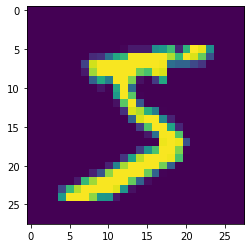

In [16]:
# let's visualise the first image from our dataset
plt.imshow(X_train[0])

with conventional network, we can't feed the image as it is, so we need to flatten the image into a 1 dimensional array of 1*(28*28)=1*784

In [18]:
num_pixel=X_train.shape[1]*X_train.shape[2]
X_train=X_train.reshape(X_train.shape[0],num_pixel).astype('float32')
X_test=X_test.reshape(X_test.shape[0],num_pixel).astype('float32')

since pixel values can range from 0 to 255, let's normalize them

In [19]:
x_train=X_train
x_test=X_test
x_train=x_train/255
x_test=x_test/255

for classification, we need to divide our target into categories. So, we'll use the to_categorical function

In [20]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

num_classes =y_test.shape[1]
print(num_classes)

10


In [22]:
# create the model
model = Sequential()
model.add(Dense(num_pixel,activation='relu',input_shape=(num_pixel,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

# compile the model
model.compile(optimizer='adam',loss='mean_squared_error',metrics='accuracy')

In [23]:
model.fit(x_train,y_train,validation_data=(x_train,y_train),epochs=10,verbose=2)

scores=model.evaluate(x_test,y_test,verbose=0)

Epoch 1/10
1875/1875 - 12s - loss: 0.0095 - accuracy: 0.9376 - val_loss: 0.0052 - val_accuracy: 0.9666
Epoch 2/10
1875/1875 - 13s - loss: 0.0047 - accuracy: 0.9698 - val_loss: 0.0031 - val_accuracy: 0.9802
Epoch 3/10
1875/1875 - 14s - loss: 0.0037 - accuracy: 0.9760 - val_loss: 0.0025 - val_accuracy: 0.9847
Epoch 4/10
1875/1875 - 13s - loss: 0.0030 - accuracy: 0.9812 - val_loss: 0.0024 - val_accuracy: 0.9849
Epoch 5/10
1875/1875 - 13s - loss: 0.0026 - accuracy: 0.9832 - val_loss: 0.0017 - val_accuracy: 0.9898
Epoch 6/10
1875/1875 - 13s - loss: 0.0021 - accuracy: 0.9869 - val_loss: 0.0018 - val_accuracy: 0.9890
Epoch 7/10
1875/1875 - 12s - loss: 0.0021 - accuracy: 0.9869 - val_loss: 0.0013 - val_accuracy: 0.9919
Epoch 8/10
1875/1875 - 11s - loss: 0.0019 - accuracy: 0.9884 - val_loss: 0.0018 - val_accuracy: 0.9894
Epoch 9/10
1875/1875 - 11s - loss: 0.0017 - accuracy: 0.9895 - val_loss: 0.0012 - val_accuracy: 0.9932
Epoch 10/10
1875/1875 - 12s - loss: 0.0018 - accuracy: 0.9891 - val_loss:

In [25]:
print('Accuracy: {}%\n error:{}'.format(scores[1],1-scores[1]))

Accuracy: 0.980400025844574%
 error:0.019599974155426025


In [26]:
# we can save the model as well as well 
model.save('classification_ model.h5')

Since our model contains multidimensional arrays of data, then models are usually saved as .h5 files.
when you want to use your model again, just go for keras.models and import it

In [29]:
from keras.models import load_model

In [30]:
trained_model=load_model('classification_ model.h5')